###**FAKE NEWS CLASSIFIER USING "TfidfVectorizer"**





Problem Statement : To build a model to accurately classify a piece of news as REAL or FAKE.

Using sklearn,  build a *TfidfVectorizer* on the provided dataset. Then, initialize a *PassiveAggressive Classifier* and fit the model. In the end, the accuracy score and the confusion matrix tell us how well our model fares.

In [0]:
#First we will import all the libraries needed for the project
import numpy as np
import pandas as pd
import itertools    #to return iterators

#sklearn is a machine learning library
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer  #import the vectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix  #for finding the accuracy and the confusion matrix
from sklearn.metrics import plot_confusion_matrix             #from the graphical view of the confusion matrix

####*Data Exploration*

In [114]:
df=pd.read_csv("/content/news.csv")

#tells us the shape = no of rows and columns
print("(rows,columns) = ",end="")
print(df.shape)

#to see first 10 rows of the dataframe
df.head(10)

(rows,columns) = (6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [115]:
print(df.columns)  #gives the list of columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


In [116]:
labels=df.label
labels.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

In [0]:
# split the datset for training as well as testing

x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)
#20 percent data will be used for training
#the column text will be taken as x_train and the column to be trained is the labels.

###*Building and intializing the  TfidfVectorizer*

In [0]:
t_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7) 
#this will stop the english words 
#words which occur more than 70 percent of the artices will be discarded

t_train=t_vectorizer.fit_transform(x_train) 

t_test=t_vectorizer.transform(x_test)

In [119]:
#to find the value of  max_iter from 1 to 100 which gives the highest accuracy we will use a loop
score11=[0]*101
for max_iter in range (1,101):
 pac1=PassiveAggressiveClassifier(max_iter)

 pac1.fit(t_train,y_train)
 y_pred=pac1.predict(t_test)
 score11[max_iter]=accuracy_score(y_test,y_pred)
 print(max_iter,end=" ")
 print(f'Accuracy: {round(score11[max_iter]*100,2)}%')

print("  ")
print("The highest value of accuracy is at max-iter of value " ,end=" ")
print(score11.index(max(score11))) #print the value of iter where value is max
print('ACCURACY IS ',end="")
print(round(max(score11)*100),end=" %")

1 Accuracy: 92.9%
2 Accuracy: 92.98%
3 Accuracy: 92.82%
4 Accuracy: 92.5%
5 Accuracy: 92.98%
6 Accuracy: 93.21%
7 Accuracy: 92.98%
8 Accuracy: 92.82%
9 Accuracy: 92.42%
10 Accuracy: 92.98%
11 Accuracy: 92.9%
12 Accuracy: 92.74%
13 Accuracy: 93.21%
14 Accuracy: 92.98%
15 Accuracy: 92.58%
16 Accuracy: 92.82%
17 Accuracy: 92.66%
18 Accuracy: 92.42%
19 Accuracy: 92.58%
20 Accuracy: 92.9%
21 Accuracy: 92.5%
22 Accuracy: 93.05%
23 Accuracy: 92.66%
24 Accuracy: 92.5%
25 Accuracy: 93.05%
26 Accuracy: 92.5%
27 Accuracy: 92.74%
28 Accuracy: 92.5%
29 Accuracy: 92.74%
30 Accuracy: 92.5%
31 Accuracy: 93.05%
32 Accuracy: 92.82%
33 Accuracy: 92.98%
34 Accuracy: 92.9%
35 Accuracy: 92.74%
36 Accuracy: 92.66%
37 Accuracy: 92.9%
38 Accuracy: 92.66%
39 Accuracy: 92.66%
40 Accuracy: 92.9%
41 Accuracy: 92.42%
42 Accuracy: 92.34%
43 Accuracy: 92.5%
44 Accuracy: 92.58%
45 Accuracy: 93.13%
46 Accuracy: 92.82%
47 Accuracy: 92.27%
48 Accuracy: 92.66%
49 Accuracy: 92.42%
50 Accuracy: 93.13%
51 Accuracy: 92.98%
52

###THE CONFUSION MATRIX

In [120]:
m=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(m)

[[590  48]
 [ 47 582]]


### *PLOTTING THE CONFUSION MATRIX USING SEABORN*

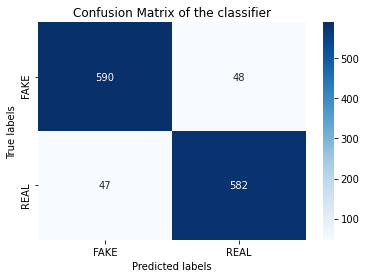

<Figure size 1080x1080 with 0 Axes>

In [121]:
import seaborn as sn
import matplotlib.pyplot as plt

ax=plt.subplot()

sn.heatmap(m ,annot=True,ax = ax,fmt='g',cmap='Blues') 
 #cmap = blue will set the color 
 #fmt is used to pass value as string
plt.figure(figsize=(15,15))  #size of figure

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['FAKE', 'REAL'])
ax.yaxis.set_ticklabels(['FAKE', 'REAL'])

ax.set_title('Confusion Matrix of the classifier') #title 
print(" ")  